In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, AveragePooling2D, MaxPooling2D
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn import neighbors

import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
filename='/content/drive/MyDrive/Colab Notebooks/ug_thesis/connect-4.data'

data= pd.read_csv(filename)

In [ ]:

data.head()


,b,b.1,b.2,b.3,b.4,b.5,b.6,b.7,b.8,b.9,b.10,b.11,x,o,b.12,b.13,b.14,b.15,x.1,o.1,x.2,o.2,x.3,o.3,b.16,b.17,b.18,b.19,b.20,b.21,b.22,b.23,b.24,b.25,b.26,b.27,b.28,b.29,b.30,b.31,b.32,b.33,win
0,b,b,b,b,b,b,b,b,b,b,b,b,x,b,b,b,b,b,x,o,x,o,x,o,o,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,win
1,b,b,b,b,b,b,o,b,b,b,b,b,x,b,b,b,b,b,x,o,x,o,x,o,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,win
2,b,b,b,b,b,b,b,b,b,b,b,b,x,b,b,b,b,b,x,o,x,o,x,o,b,b,b,b,b,b,o,b,b,b,b,b,b,b,b,b,b,b,win
3,o,b,b,b,b,b,b,b,b,b,b,b,x,b,b,b,b,b,x,o,x,o,x,o,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,win
4,b,b,b,b,b,b,b,b,b,b,b,b,x,b,b,b,b,b,x,o,x,o,x,o,b,b,b,b,b,b,b,b,b,b,b,b,o,b,b,b,b,b,win


In [ ]:
data.tail(5)

,b,b.1,b.2,b.3,b.4,b.5,b.6,b.7,b.8,b.9,b.10,b.11,x,o,b.12,b.13,b.14,b.15,x.1,o.1,x.2,o.2,x.3,o.3,b.16,b.17,b.18,b.19,b.20,b.21,b.22,b.23,b.24,b.25,b.26,b.27,b.28,b.29,b.30,b.31,b.32,b.33,win
67551,x,x,b,b,b,b,o,x,o,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,o,o,x,b,b,b,loss
67552,x,x,b,b,b,b,o,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,o,x,o,o,x,b,draw
67553,x,x,b,b,b,b,o,o,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,o,x,x,o,b,b,loss
67554,x,o,b,b,b,b,o,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,o,x,o,x,x,b,draw
67555,x,o,o,o,x,b,o,b,b,b,b,b,x,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,x,b,b,b,b,b,draw


In [ ]:
data.shape

(67556, 43)

In [ ]:
###pop and concat a column
data= pd.read_csv(filename)

td = data.pop('win')
fullData=pd.concat([data, td], axis=1)


In [ ]:
###check column all unique category
fullData.win.unique()

array(['win', 'draw', 'loss'], dtype=object)

In [ ]:
####Mapping function encoding
###Manually convert with our own numeric value used 

dataMapping={'win':0,'draw':1,'loss':2}
fullData['win']=fullData['win'].map(dataMapping)


In [ ]:
fullData.win.unique()

array([0, 1, 2])

In [ ]:
data.columns

Index(['b', 'b.1', 'b.2', 'b.3', 'b.4', 'b.5', 'b.6', 'b.7', 'b.8', 'b.9',
       'b.10', 'b.11', 'x', 'o', 'b.12', 'b.13', 'b.14', 'b.15', 'x.1', 'o.1',
       'x.2', 'o.2', 'x.3', 'o.3', 'b.16', 'b.17', 'b.18', 'b.19', 'b.20',
       'b.21', 'b.22', 'b.23', 'b.24', 'b.25', 'b.26', 'b.27', 'b.28', 'b.29',
       'b.30', 'b.31', 'b.32', 'b.33'],
      dtype='object')

In [ ]:
## Label enconding

from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

##for all data to excat label convert to numeric using label encoding
for x in data.columns:
    data[x]=le.fit_transform(data[x])
    
    
data.tail()




,b,b.1,b.2,b.3,b.4,b.5,b.6,b.7,b.8,b.9,b.10,b.11,x,o,b.12,b.13,b.14,b.15,x.1,o.1,x.2,o.2,x.3,o.3,b.16,b.17,b.18,b.19,b.20,b.21,b.22,b.23,b.24,b.25,b.26,b.27,b.28,b.29,b.30,b.31,b.32,b.33
67551,2,2,0,0,0,0,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,0,0,0
67552,2,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,2,0
67553,2,2,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,1,0,0
67554,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,2,2,0
67555,2,1,1,1,2,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0


In [ ]:
###check for any null have or not
data.isnull().sum()
   
    

b       0
b.1     0
b.2     0
b.3     0
b.4     0
b.5     0
b.6     0
b.7     0
b.8     0
b.9     0
b.10    0
b.11    0
x       0
o       0
b.12    0
b.13    0
b.14    0
b.15    0
x.1     0
o.1     0
x.2     0
o.2     0
x.3     0
o.3     0
b.16    0
b.17    0
b.18    0
b.19    0
b.20    0
b.21    0
b.22    0
b.23    0
b.24    0
b.25    0
b.26    0
b.27    0
b.28    0
b.29    0
b.30    0
b.31    0
b.32    0
b.33    0
dtype: int64

In [ ]:
####concate win column that are poped before

td = fullData.pop('win')

data=pd.concat([data, td], axis=1)
data

,b,b.1,b.2,b.3,b.4,b.5,b.6,b.7,b.8,b.9,b.10,b.11,x,o,b.12,b.13,b.14,b.15,x.1,o.1,x.2,o.2,x.3,o.3,b.16,b.17,b.18,b.19,b.20,b.21,b.22,b.23,b.24,b.25,b.26,b.27,b.28,b.29,b.30,b.31,b.32,b.33,win
0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,1,2,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,2,1,2,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,1,2,1,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,1,2,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,1,2,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67551,2,2,0,0,0,0,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,0,0,0,2
67552,2,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,2,0,1
67553,2,2,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,1,0,0,2
67554,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,2,2,0,1


In [ ]:
#data.win.unique()
data["b.32"].unique()

array([0, 1, 2])

In [ ]:
data.shape

(67556, 43)

In [ ]:
# load the dataset
fileName=data

def load_dataset(filename):
    # load the dataset as a pandas DataFrame
    data = filename
   # numpy array retrieval
    dataset = data.values
    # split into input (X) and output (y) variables
    X = dataset[:, :-1]
    y = dataset[:,-1]
    # format all fields as string
    X = X.astype(str)
    # reshape target to be a 2d array
    y = y.reshape((len(y), 1))
    return X, y
 

X, y = load_dataset(fileName)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=data['win'])
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)
# X_train
X_train.shape

Train (47289, 42) (47289, 1)
Test (20267, 42) (20267, 1)


(47289, 42)

In [ ]:
#####  Generate a 2D Convolutional Neural Network

def generate_CNN(conv_layers=[], dense_layers=[], lr=0.01):
    
    # Basic Input Layers : Conv2D layer with 4x4 filter, followed by 2x2 filter
    model = Sequential()
    model.add(Conv2D(42, (4,4), input_shape=(6,7,1), activation='tanh', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

    # Add pre-flattening layers
    if len(conv_layers) != 0:
        for l in conv_layers:
            model.add(l)
    
    model.add(Flatten())

    # Add Post flattening layers
    if len(dense_layers) > 0:
        for l in new_layers:
            model.add(l)

    model.add(Dense(1,   activation='sigmoid'))

    # Define optimizer with provided learning rate
    adam_optimizer = optimizers.Adam(lr=lr)
    
    # compile and return model :
    model.compile(optimizer=adam_optimizer, loss=losses.mean_squared_error, metrics=['accuracy'])
    return model



In [ ]:
demo_model = generate_CNN()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
###Preprocessing Game Data
###Separate data into features and target

dataset = data.values
print(type(dataset))

features = dataset[:,:-1].copy()
target   = dataset[:,-1].copy()


for i, t in enumerate(target):
    if (t != 1):
        target[i] = 0

###
features = features.reshape(features.shape[0], 6, 7, 1)



<class 'numpy.ndarray'>


In [ ]:

# Train test split data
X_train, X_test, y_train, y_test = train_test_split(features, target)


In [ ]:
###Fitting the Model

fittedModel=demo_model.fit(X_train, y_train, epochs=5, verbose=1, validation_data=(X_test, y_test))
fittedModel

Epoch 1/5
1584/1584 [==============================] - 6s 4ms/step - loss: 0.0867 - accuracy: 0.9037 - val_loss: 0.0852 - val_accuracy: 0.9050
Epoch 2/5
1584/1584 [==============================] - 6s 4ms/step - loss: 0.0857 - accuracy: 0.9037 - val_loss: 0.0867 - val_accuracy: 0.9015
Epoch 3/5
1584/1584 [==============================] - 6s 4ms/step - loss: 0.0854 - accuracy: 0.9032 - val_loss: 0.0844 - val_accuracy: 0.9048
Epoch 4/5
1584/1584 [==============================] - 6s 4ms/step - loss: 0.0849 - accuracy: 0.9036 - val_loss: 0.0864 - val_accuracy: 0.9053
Epoch 5/5
1584/1584 [==============================] - 6s 4ms/step - loss: 0.0851 - accuracy: 0.9036 - val_loss: 0.0875 - val_accuracy: 0.9027


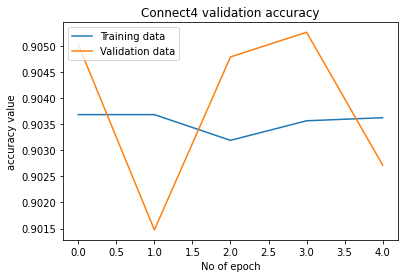

In [ ]:

plt.plot(fittedModel.history['accuracy'], label='Training data')

plt.plot(fittedModel.history['val_accuracy'], label='Validation data')

plt.ylabel('accuracy value')
plt.xlabel('No of epoch')
plt.title('Connect4 validation accuracy')
plt.legend(loc='upper left')
plt.show()



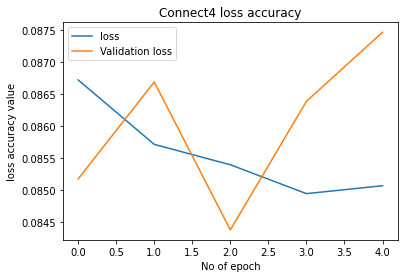

In [ ]:
plt.plot(fittedModel.history['loss'], label='loss')

plt.plot(fittedModel.history['val_loss'], label='Validation loss')

plt.ylabel('loss accuracy value')
plt.xlabel('No of epoch')
plt.title('Connect4 loss accuracy')
plt.legend(loc='upper left')
plt.show()

In [ ]:
print(X_train.shape)
print(X_test.shape)


(50667, 6, 7, 1)
(16889, 6, 7, 1)


In [ ]:
#####For KNN
X_train = X_train.reshape(50667,6*7*1)
X_test=X_test.reshape(16889,6*7*1)
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:

classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[15048   241]
 [ 1447   153]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     15289
           1       0.39      0.10      0.15      1600

    accuracy                           0.90     16889
   macro avg       0.65      0.54      0.55     16889
weighted avg       0.86      0.90      0.87     16889

Accuracy: 0.9000532891230979
